In [1]:
import pandas as pd
import numpy as np 
import pickle 
import numpy as np 
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string as s
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import re

[nltk_data] Downloading package stopwords to C:\Users\BINJAL
[nltk_data]     SONI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\BINJAL
[nltk_data]     SONI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv(r'C:\Users\BINJAL SONI\OneDrive\Desktop\PDPU-Master\2nd Sem\Capstone Project\Fake News Detection\Datasets\21-02-2023\Constraint_Train.csv')
df.head(5)

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [3]:
df = df[df['tweet'].notna()]

In [4]:
exx=df.tweet

In [5]:
def tokenization(text):
    lst=text.split()
    return lst
exx2=exx.apply(tokenization)

In [6]:
def lowercasing(lst):
    new_lst=[]
    for i in lst:
        i=i.lower()
        new_lst.append(i)
    return new_lst
exx2=exx2.apply(lowercasing)

In [7]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for j in s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
exx2=exx2.apply(remove_punctuations)
#test_x=test_x.apply(remove_punctuations)

In [8]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]
    for i in lst:
        for j in s.digits:    
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in nodig_lst:
        if i!='':
            new_lst.append(i)
    return new_lst
exx2=exx2.apply(remove_numbers)
#test_x=test_x.apply(remove_numbers)

In [9]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

exx2=exx2.apply(remove_stopwords)
#test_x=test_x.apply(remove_stopwords)

In [10]:
def remove_spaces(lst):
    new_lst=[]
    for i in lst:
        i=i.strip()
        new_lst.append(i)
    return new_lst
exx2=exx2.apply(remove_spaces)
#test_x=test_x.apply(remove_spaces)


In [11]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
exx2=exx2.apply(lemmatzation)
#test_x=test_x.apply(lemmatzation)


In [12]:
#exx2 = exx.astype(str)
#exx2

exx2=exx2.apply(lambda x: ''.join(i+' ' for i in x))

print(type(exx2))
exx2.head()

<class 'pandas.core.series.Series'>


0    cdc currently report death general discrepancy...
1    state reported death small rise last tuesday s...
2    politically correct woman almost us pandemic e...
3    indiafightscorona covid testing laboratory ind...
4    populous state generate large case count look ...
Name: tweet, dtype: object

In [15]:
joblib_vect = pickle.load(open('tfidfvect96.pkl', 'rb'))

In [16]:
joblib_model = pickle.load(open('naive96.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect96.pkl', 'rb'))
ans1=joblib_vect.transform(exx2)
ans = ans1.toarray()
pred_ans=joblib_model.predict(ans)

clickbait_list = pred_ans.tolist()
print(clickbait_list)

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [18]:
joblib_model2 = pickle.load(open('finalized_model.pkl', 'rb'))
joblib_vect2 = pickle.load(open('tfidfvect96.pkl', 'rb'))
ans1=joblib_vect2.transform(exx2)
ans2 = ans1.toarray()
pred_ans2=joblib_model.predict(ans2)

clickbait_list2 = pred_ans2.tolist()
print(clickbait_list2)

C:\Users\BINJAL SONI\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MultinomialNB from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [19]:

if(clickbait_list2 == clickbait_list):
  print("1")

1


In [20]:
df2 = pd.DataFrame()
df2["id"] = df.id
df2["tweet"] = df.tweet
df2["fake_news"] = df.label
df2["clickbait"] = clickbait_list
df2.head(10)

,id,tweet,fake_news,clickbait
0,1,The CDC currently reports 99031 deaths. In gen...,real,0
1,2,States reported 1121 deaths a small rise from ...,real,0
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,1
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,0
4,5,Populous states can generate large case counts...,real,0
5,6,"Covid Act Now found ""on average each person in...",real,0
6,7,If you tested positive for #COVID19 and have n...,real,0
7,8,Obama Calls Trump’s Coronavirus Response A Cha...,fake,0
8,9,"???Clearly, the Obama administration did not l...",fake,1
9,10,Retraction—Hydroxychloroquine or chloroquine w...,fake,0


In [26]:
df2.to_csv(r'C:\Users\BINJAL SONI\OneDrive\Desktop\PDPU-Master\2nd Sem\Capstone Project\Fake News Detection\Datasets\21-02-2023\FakeNews_and_Clickbait_Detection.csv')

In [27]:
df5 = pd.read_csv(r'C:\Users\BINJAL SONI\OneDrive\Desktop\PDPU-Master\2nd Sem\Capstone Project\Fake News Detection\Datasets\21-02-2023\FakeNews_and_Clickbait_Detection.csv')
df5.head(5)

,Unnamed: 0,id,tweet,fake_news,clickbait
0,0,1,The CDC currently reports 99031 deaths. In gen...,real,0
1,1,2,States reported 1121 deaths a small rise from ...,real,0
2,2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,1
3,3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,0
4,4,5,Populous states can generate large case counts...,real,0


In [29]:
nc = 0
fnc = 0
fnnc = 0
nnc = 0
for i in range(len(df2)):
  if(df2.iloc[i,3] == 1):
    if(df2.iloc[i,3] == 1):
      fnc+=1
    else:
      fnnc+=1
  else:
    if(df2.iloc[i,3] == 1):
      nc+=1
    else:
      nnc+=1
print(nc,fnc,fnnc,nnc)

0 607 0 5813


In [30]:
x_names = ["News", "Fake News"]
nc_values = [nnc,fnnc]
c_values = [nc,fnc] 
X_axis = np.arange(len(x_names))

Text(0, 0.5, 'Number')

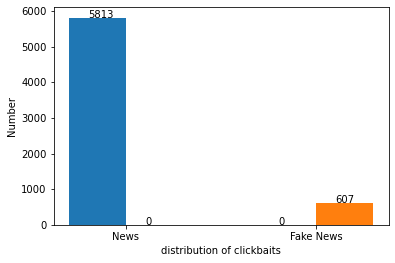

In [31]:
plt.bar(X_axis - 0.15, nc_values, 0.3, label = 'non-clickbaits')
for i in range(len(X_axis)):
        plt.text(i - 0.2,nc_values[i],nc_values[i])
plt.bar(X_axis + 0.15, c_values, 0.3, label = 'clickbaits')
for i in range(len(X_axis)):
        plt.text(i + 0.1,c_values[i],c_values[i])
plt.xticks(X_axis, x_names)
plt.xlabel("distribution of clickbaits")
plt.ylabel("Number")

No handles with labels found to put in legend.


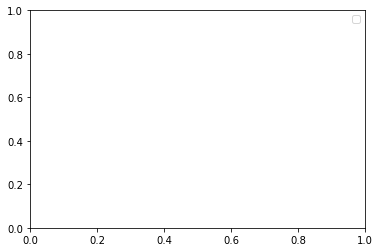

In [32]:
plt.legend()
plt.show()

In [33]:
x_names = ["Clickbaits", "Non-Clickbaits"]
n_values = [nc,nnc]
fn_values = [fnc,fnnc] 
X_axis = np.arange(len(x_names))

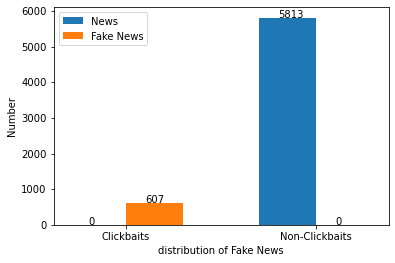

In [35]:
plt.bar(X_axis - 0.15, n_values, 0.3, label = 'News')
for i in range(len(X_axis)):
        plt.text(i - 0.2,n_values[i],n_values[i])
plt.bar(X_axis + 0.15, fn_values, 0.3, label = 'Fake News')
for i in range(len(X_axis)):
        plt.text(i + 0.1,fn_values[i],fn_values[i])
plt.xticks(X_axis, x_names)
plt.xlabel("distribution of Fake News")
plt.ylabel("Number")
plt.legend()
plt.show()